## Pacotes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
#!pip show numpy
#!cat /etc/os-release
#!free -h
#!df -h
#!cat /proc/cpuinfo
#!python --version

Python 3.10.12


## Fonte de dados pré processada

In [ ]:
#url = '/content/Tabela_Taco_Pre_Processada_preditivo_scaled.csv'
url = 'https://raw.githubusercontent.com/LucaseNogueira/ClassificarAlimentosData/main/data/Atualizada/Tabela_Taco_Pre_Processada.csv'
df = pd.read_csv(url)

In [ ]:
df

,AG Linoléico (g),AG Linolênico (g),AG Mono (g),AG Poli (g),AG Saturados (g),AG Trans total(g),Açúcar de adição (g),Açúcar total (g),Carboidrato (g),Cobalamina (mcg),...,Selênio (mcg),Sódio (mg),Sódio de adição (mg),Tiamina (mg),Vitamina A (RAE) (mcg),Vitamina C (mg),Vitamina D (mcg),Vitamina E (mg),Zinco (mg),Grupo Alimentar
0,-0.279045,-0.136290,-0.512921,-0.312751,-0.493113,-0.250782,-0.359853,-0.488320,0.378750,-0.194735,...,-0.171991,-0.531595,1.978823,-0.327295,-0.190851,-0.137759,-0.306252,-0.342036,-0.154051,Cereais e leguminosas
1,-0.205207,-0.125596,-0.443352,-0.235356,-0.475181,-0.250782,-0.359853,-0.488320,0.283961,-0.194735,...,-0.171991,-0.531491,1.284728,-0.140429,-0.190851,-0.137759,-0.306252,-0.342036,-0.125130,Cereais e leguminosas
2,0.626119,0.243657,-0.250190,0.585031,-0.353792,-0.227506,-0.359853,-0.281128,0.264952,-0.194735,...,-0.146422,0.050968,1.027913,0.179879,-0.174186,-0.064623,-0.306252,-0.107485,-0.135064,Cereais e leguminosas
3,0.626119,0.243657,-0.250190,0.585031,-0.353792,-0.227506,-0.359853,-0.281128,0.264952,-0.194735,...,-0.146432,-0.534436,1.027913,0.179879,-0.174186,-0.064623,-0.306252,-0.107485,-0.135064,Cereais e leguminosas
4,-0.121058,-0.065233,-0.465883,-0.142130,-0.497037,-0.246447,-0.359853,-0.469634,-0.228849,-0.194735,...,-0.147015,-0.220186,0.201941,-0.079605,-0.188539,-0.137759,-0.306252,-0.293327,-0.208336,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,-0.397260,-0.175397,-0.025013,-0.407357,0.022880,-0.255467,-0.359853,-0.488320,-0.309809,-0.194735,...,-0.176643,3.341752,-0.672618,-0.256527,-0.190851,-0.137759,-0.306252,-0.380054,0.183822,Miscelâneas
808,0.045976,0.049250,-0.378938,0.031649,-0.366650,-0.212173,-0.359853,-0.391936,0.159105,-0.179063,...,-0.089767,0.402000,-0.672618,0.007676,-0.180976,-0.137688,-0.084334,-0.238527,-0.156282,Miscelâneas
809,-0.354558,-0.166644,-0.523653,-0.373081,-0.515810,-0.253124,-0.359853,-0.488320,0.427997,-0.194735,...,-0.176643,-0.531821,1.645657,-0.256527,-0.190851,-0.072291,-0.306252,-0.380054,-0.175927,Miscelâneas
810,0.295681,0.073124,-0.020780,0.274485,-0.116592,-0.240584,-0.359853,-0.444849,-0.186393,-0.116566,...,0.012157,-0.371966,1.364549,-0.242373,-0.074370,-0.137759,0.257046,0.005927,-0.104029,Miscelâneas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AG Linoléico (g)           812 non-null    float64
 1   AG Linolênico (g)          812 non-null    float64
 2   AG Mono (g)                812 non-null    float64
 3   AG Poli (g)                812 non-null    float64
 4   AG Saturados (g)           812 non-null    float64
 5   AG Trans total(g)          812 non-null    float64
 6   Açúcar de adição (g)       812 non-null    float64
 7   Açúcar total (g)           812 non-null    float64
 8   Carboidrato (g)            812 non-null    float64
 9   Cobalamina (mcg)           812 non-null    float64
 10  Cobre (mg)                 812 non-null    float64
 11  Colesterol (mg)            812 non-null    float64
 12  Cálcio (mg)                812 non-null    float64
 13  Código da preparação       812 non-null    float64

In [ ]:
grupo_alimentar_label = sorted(df['Grupo Alimentar'].unique())
grupo_alimentar_label

['Aves e ovos',
 'Açúcares e produtos de confeitaria',
 'Bebidas alcoólicas',
 'Bebidas não alcoólicas e infusões',
 'Carnes e vísceras',
 'Carnes industrializadas',
 'Cereais e leguminosas',
 'Cocos, castanhas e nozes',
 'Enlatados e conservas',
 'Farinhas, féculas e massas',
 'Frutas',
 'Hortaliças folhosas, frutosas e outras',
 'Hortaliças tuberosas',
 'Laticínios',
 'Miscelâneas',
 'Panificados',
 'Pescados e frutos do mar',
 'Sais e condimentos',
 'Óleos e gorduras']

## Variaveis explicativas & Variavel alvo

In [ ]:
x = df.drop(['Grupo Alimentar'], axis=1)
y = df['Grupo Alimentar']

In [ ]:
x

,AG Linoléico (g),AG Linolênico (g),AG Mono (g),AG Poli (g),AG Saturados (g),AG Trans total(g),Açúcar de adição (g),Açúcar total (g),Carboidrato (g),Cobalamina (mcg),...,Riboflavina (mg),Selênio (mcg),Sódio (mg),Sódio de adição (mg),Tiamina (mg),Vitamina A (RAE) (mcg),Vitamina C (mg),Vitamina D (mcg),Vitamina E (mg),Zinco (mg)
0,-0.279045,-0.136290,-0.512921,-0.312751,-0.493113,-0.250782,-0.359853,-0.488320,0.378750,-0.194735,...,-0.442155,-0.171991,-0.531595,1.978823,-0.327295,-0.190851,-0.137759,-0.306252,-0.342036,-0.154051
1,-0.205207,-0.125596,-0.443352,-0.235356,-0.475181,-0.250782,-0.359853,-0.488320,0.283961,-0.194735,...,-0.442155,-0.171991,-0.531491,1.284728,-0.140429,-0.190851,-0.137759,-0.306252,-0.342036,-0.125130
2,0.626119,0.243657,-0.250190,0.585031,-0.353792,-0.227506,-0.359853,-0.281128,0.264952,-0.194735,...,-0.284106,-0.146422,0.050968,1.027913,0.179879,-0.174186,-0.064623,-0.306252,-0.107485,-0.135064
3,0.626119,0.243657,-0.250190,0.585031,-0.353792,-0.227506,-0.359853,-0.281128,0.264952,-0.194735,...,-0.284106,-0.146432,-0.534436,1.027913,0.179879,-0.174186,-0.064623,-0.306252,-0.107485,-0.135064
4,-0.121058,-0.065233,-0.465883,-0.142130,-0.497037,-0.246447,-0.359853,-0.469634,-0.228849,-0.194735,...,-0.286301,-0.147015,-0.220186,0.201941,-0.079605,-0.188539,-0.137759,-0.306252,-0.293327,-0.208336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,-0.397260,-0.175397,-0.025013,-0.407357,0.022880,-0.255467,-0.359853,-0.488320,-0.309809,-0.194735,...,-0.442155,-0.176643,3.341752,-0.672618,-0.256527,-0.190851,-0.137759,-0.306252,-0.380054,0.183822
808,0.045976,0.049250,-0.378938,0.031649,-0.366650,-0.212173,-0.359853,-0.391936,0.159105,-0.179063,...,-0.292887,-0.089767,0.402000,-0.672618,0.007676,-0.180976,-0.137688,-0.084334,-0.238527,-0.156282
809,-0.354558,-0.166644,-0.523653,-0.373081,-0.515810,-0.253124,-0.359853,-0.488320,0.427997,-0.194735,...,-0.442155,-0.176643,-0.531821,1.645657,-0.256527,-0.190851,-0.072291,-0.306252,-0.380054,-0.175927
810,0.295681,0.073124,-0.020780,0.274485,-0.116592,-0.240584,-0.359853,-0.444849,-0.186393,-0.116566,...,0.170284,0.012157,-0.371966,1.364549,-0.242373,-0.074370,-0.137759,0.257046,0.005927,-0.104029


In [ ]:
y

,Grupo Alimentar
0,Cereais e leguminosas
1,Cereais e leguminosas
2,Cereais e leguminosas
3,Cereais e leguminosas
4,Cereais e leguminosas
...,...
807,Miscelâneas
808,Miscelâneas
809,Miscelâneas
810,Miscelâneas


## Dividindo os dados em treino e teste

Vamos utilizar o método `train_test_split` da biblioteca **Skitlearn** para dividir os nossos dados em treinamento e testes. Este métodos possui alguns parametros muito importantes para o controle desta divisão, sendo eles:
- **test_size**: determina a proporção dos dados que será alocada para o conjunto de teste. Pode ser um valor entre 0 e 1 (representando a porcentagem) ou um inteiro (representando o número absoluto de amostras).
- **random_state**: define a semente para o gerador de números aleatórios usado na divisão de dados. Ao usar o mesmo valor para ``random_state``, será obtido a mesma divisão de treino e teste sempre que executar o código.
- **stratify**: permite criar uma divisão estratificada dos dados, garantindo que a proporção das classes na variável alvo seja mantida nos conjuntos de treino e teste. Muito útil quando as classes estão desbalanceadas

In [ ]:
reprodutibilidade = 42
tamanho_teste = 0.15
profundidade = 10

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=tamanho_teste, random_state=reprodutibilidade, stratify=y)
#x_treino, x_val, y_treino, y_val = train_test_split(x_treino, y_treino, random_state=reprodutibilidade, stratify=y_treino)

In [ ]:
y_treino.value_counts()

,count
Grupo Alimentar,
Miscelâneas,101
"Hortaliças folhosas, frutosas e outras",70
Açúcares e produtos de confeitaria,63
Carnes e vísceras,62
Frutas,52
Panificados,48
Laticínios,43
Aves e ovos,41
"Farinhas, féculas e massas",30


In [ ]:
px.histogram(y_treino, 'Grupo Alimentar', text_auto=True)

<ipython-input-15-2c65aeedf10c>:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



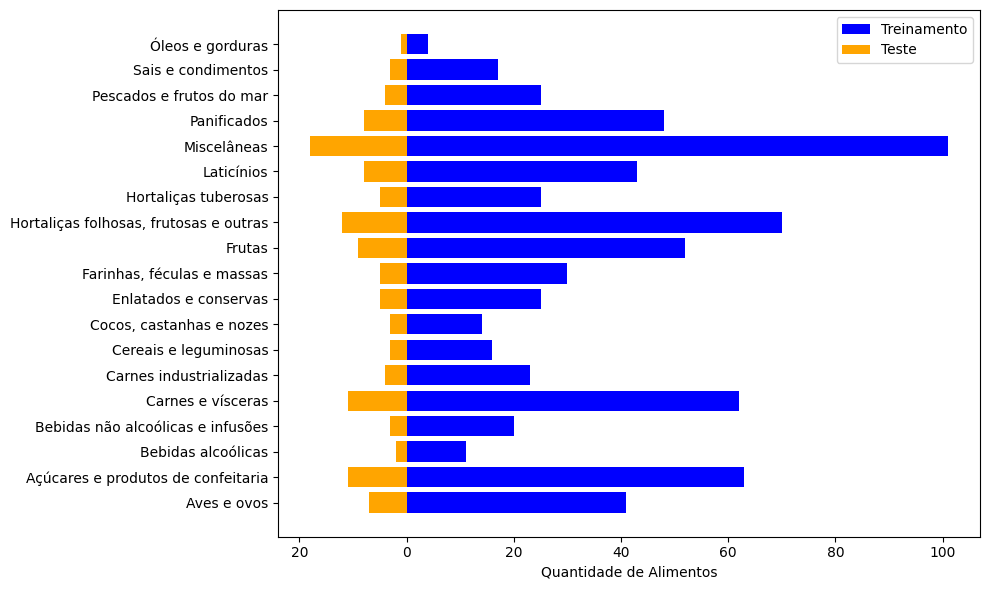

In [ ]:


# Contagem de alimentos por grupo alimentar nos conjuntos de treino e teste
treino_counts = y_treino.value_counts().sort_index()
teste_counts = y_teste.value_counts().sort_index()

# Criar um DataFrame combinando as contagens de treino e teste
df_comparacao = pd.DataFrame({
    'Treinamento': treino_counts,
    'Teste': teste_counts
}).fillna(0)  # Preenche com 0 caso um grupo não esteja em um dos conjuntos

# Preparar os dados para as barras espelhadas
grupos = df_comparacao.index
treinamento = df_comparacao['Treinamento']
teste = -df_comparacao['Teste']  # Valores negativos para espelhar

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Criar as barras para o conjunto de treinamento (para cima)
ax.barh(grupos, treinamento, color='blue', label='Treinamento')

# Criar as barras para o conjunto de teste (espelhadas para baixo)
ax.barh(grupos, teste, color='orange', label='Teste')

# Ajustar o eixo X para mostrar valores positivos
xticks = ax.get_xticks()  # Obter os valores atuais dos ticks
ax.set_xticklabels([abs(int(x)) for x in xticks])  # Tornar todos os valores positivos

# Adicionar título e rótulos
#plt.title('Comparação Espelhada da Quantidade de Alimentos nos conjuntos de Treinamento e Teste')
plt.xlabel('Quantidade de Alimentos')

# Ajustar os rótulos do eixo Y para ficarem visíveis
plt.yticks(grupos)

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Configurando Validação Cruzada com K-Fold Cross Validation

In [ ]:
# Definir o K-Fold (com 5 folds, por exemplo)
kf = KFold(n_splits=5, shuffle=True, random_state=reprodutibilidade)

## Realizando o balanceamento das variaveis de treinamento

Nesta etapa de balanceamento eu preferi utilizar a técnica SMOTE para realizar o balanceamento dos dados de treinamento do modelo preditivo. A utilização desta técnica visa balancear os dados de treinamento criando novas amostras sintéticas da classe minoritária **interpolando** entre amostras existentes, gerando amostras diversicadas e reduzindo o risco de overfitting.

A técnica de SMOTE é uma técnica de oversampling, que adiciona amostras a uma classe minoritária no modelo.

A decisão de utilizar a técnica SMOTE veio comparando a mesma com outras técnicas de oversampling, sendo elas a RandomOverSampling e ADASYN.

A técnica de RandomOverSampling duplica aleatóriamente amostras da classe minoritária até atingir um equilibrio com a quantidade de amostras das classes majoritárias. É conhecida por ser uma técnica simples de implementar porém, por duplicar amostras existentes, pode levar ao overfitting.

Já a técnica de ADASYN tem desenvolvimento similar ao SMOTE, porém ela gera amostras onde a classe minoritária é mais difícil de aprender. Seu uso pode ser mais sensivel a ruídos e outliers nos dados.

Este problema de desbalanceamento é normal em conjuntos de dados multiclasse, que é o nosso caso.

In [ ]:
oversample = SMOTE(random_state=reprodutibilidade, k_neighbors=3)
x_treino_balanceado, y_treino_balanceado = oversample.fit_resample(x_treino, y_treino)

In [ ]:
y_treino_balanceado.value_counts()

,count
Grupo Alimentar,
Laticínios,101
Carnes e vísceras,101
Bebidas não alcoólicas e infusões,101
Aves e ovos,101
Panificados,101
Bebidas alcoólicas,101
"Cocos, castanhas e nozes",101
Óleos e gorduras,101
"Farinhas, féculas e massas",101


In [ ]:
print("Quantidade Y: " + str(y.count()))
print("Quantidade Y_Treino: " + str(y_treino.count()))
# print("Quantidade Y_Val: " + str(y_val.count()))
print("Quantidade Y_Teste: " + str(y_teste.count()))

Quantidade Y: 812
Quantidade Y_Treino: 690
Quantidade Y_Teste: 122


## Inicializando os modelos preditivos

In [ ]:
modelo_arvore = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None)

modelo_random = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None)

modelo_gbc = GradientBoostingClassifier(
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=10,
    min_impurity_decrease=0.0,
    init=None,
    random_state=42,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0)

## Validando o modelo de Arvore de Decisão

In [ ]:
#modelo_arvore = DecisionTreeClassifier(random_state=reprodutibilidade, max_depth=profundidade)
#modelo_arvore.fit(x_treino_balanceado, y_treino_balanceado)
#y_pred_arvore = modelo_arvore.predict(x_val)
y_pred_arvore = cross_val_predict(modelo_arvore, x_treino_balanceado, y_treino_balanceado, cv=kf)
scores = cross_val_score(modelo_arvore, x_treino_balanceado, y_treino_balanceado, cv=kf, scoring='accuracy')

# Exibir os resultados de cada fold e a média final
print("Scores de cada fold: ", scores)
print("Média de acurácia: ", scores.mean())

Scores de cada fold:  [0.8046875  0.81510417 0.82552083 0.82291667 0.81984334]
Média de acurácia:  0.8176145017406441


                                        precision    recall  f1-score   support

                           Aves e ovos       0.90      0.93      0.92       101
    Açúcares e produtos de confeitaria       0.70      0.67      0.69       101
                    Bebidas alcoólicas       0.95      0.95      0.95       101
     Bebidas não alcoólicas e infusões       0.82      0.85      0.83       101
                     Carnes e vísceras       0.89      0.89      0.89       101
               Carnes industrializadas       0.90      0.92      0.91       101
                 Cereais e leguminosas       0.93      0.90      0.91       101
              Cocos, castanhas e nozes       0.89      0.89      0.89       101
                 Enlatados e conservas       0.48      0.83      0.61       101
            Farinhas, féculas e massas       0.62      0.68      0.65       101
                                Frutas       0.82      0.79      0.81       101
Hortaliças folhosas, frutosas e outras 

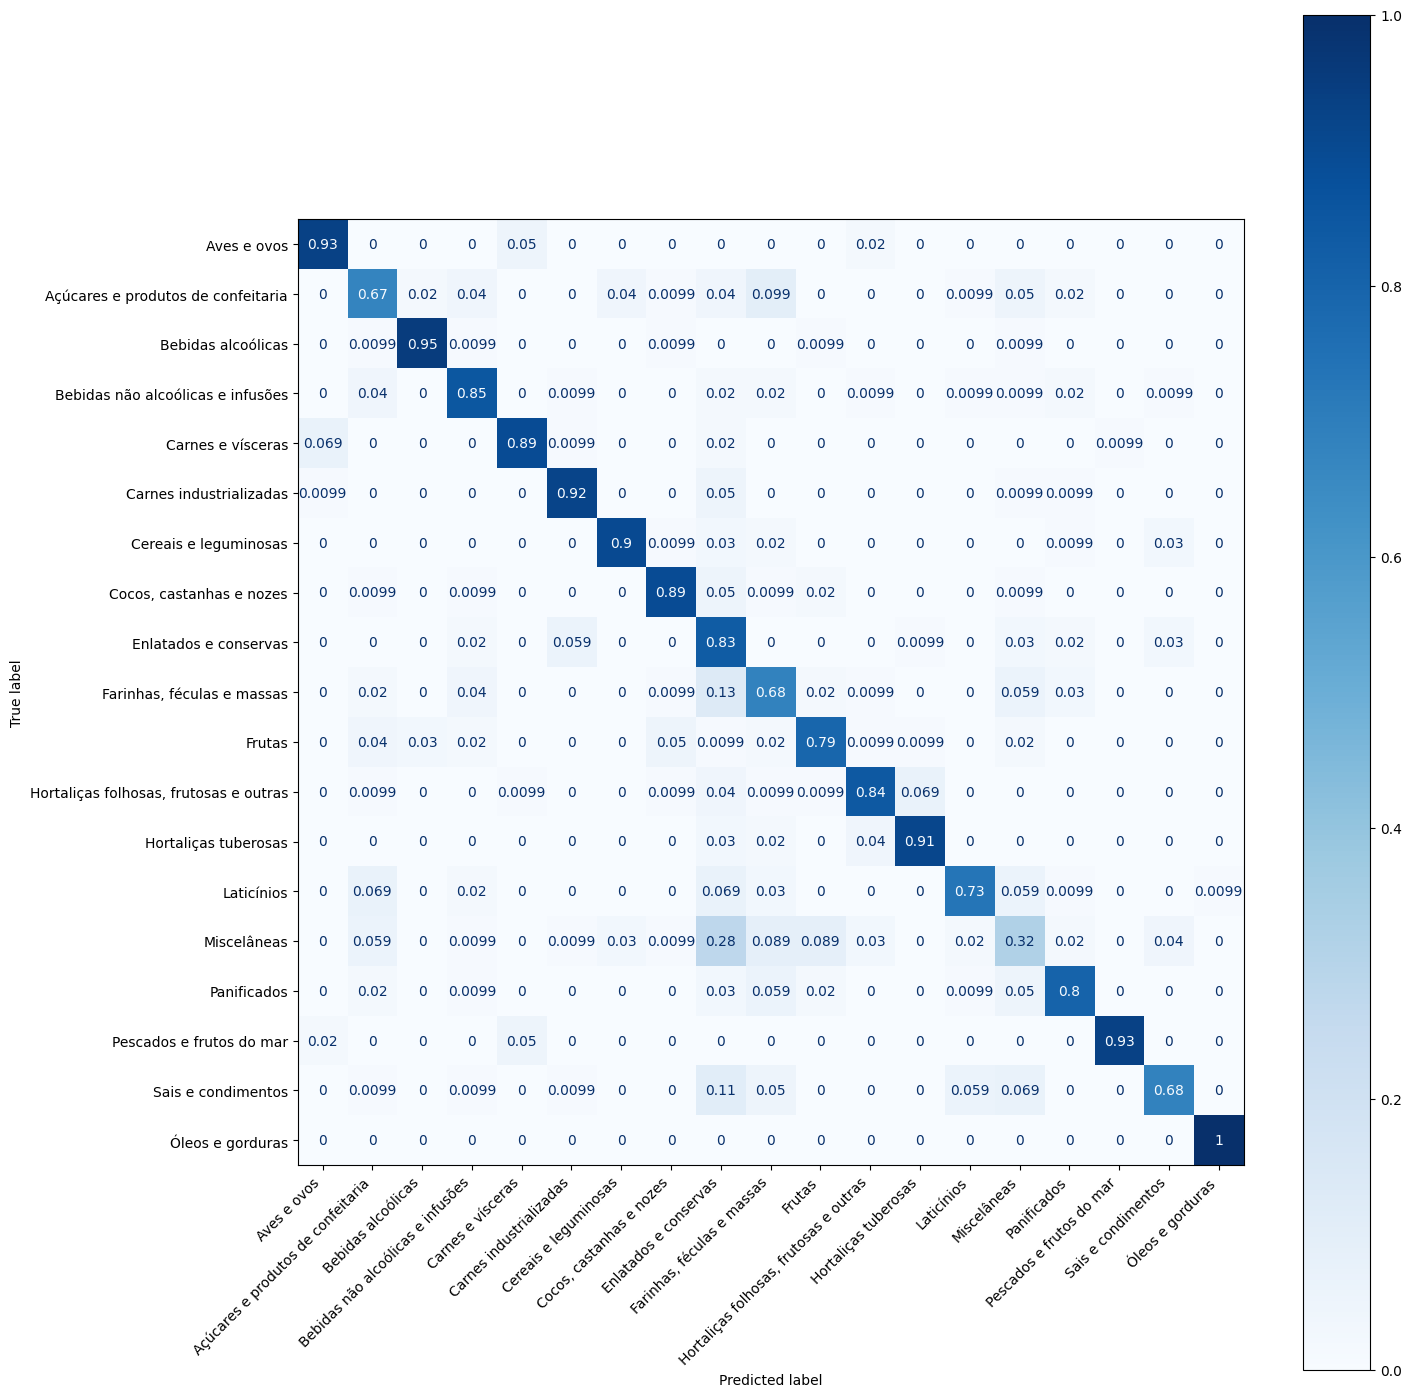

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))

# Imprime o relatório de classificação
print(classification_report(y_treino_balanceado, y_pred_arvore))

# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    y_treino_balanceado,
    y_pred_arvore,
    normalize='true',
    cmap='Blues',
    display_labels=grupo_alimentar_label,
    ax=axes
)

# Rotaciona as labels do eixo x para que não fiquem coladas
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe a figura
plt.show()


## Treinando o modelo RandomForest

In [ ]:
#modelo_random = RandomForestClassifier(random_state=reprodutibilidade, max_depth=profundidade)
# modelo_random.fit(x_treino_balanceado, y_treino_balanceado)
# y_pred_random = modelo_random.predict(x_val)
y_pred_random = cross_val_predict(modelo_random, x_treino_balanceado, y_treino_balanceado, cv=kf)
scores = cross_val_score(modelo_random, x_treino_balanceado, y_treino_balanceado, cv=kf, scoring='accuracy')

# Exibir os resultados de cada fold e a média final
print("Scores de cada fold: ", scores)
print("Média de acurácia: ", scores.mean())

Scores de cada fold:  [0.890625   0.90364583 0.94010417 0.9375     0.92689295]
Média de acurácia:  0.919753590078329


                                        precision    recall  f1-score   support

                           Aves e ovos       1.00      0.96      0.98       101
    Açúcares e produtos de confeitaria       0.87      0.78      0.82       101
                    Bebidas alcoólicas       0.98      0.99      0.99       101
     Bebidas não alcoólicas e infusões       0.90      0.96      0.93       101
                     Carnes e vísceras       0.95      0.98      0.97       101
               Carnes industrializadas       0.96      0.97      0.97       101
                 Cereais e leguminosas       0.95      0.95      0.95       101
              Cocos, castanhas e nozes       0.88      0.96      0.92       101
                 Enlatados e conservas       0.88      0.86      0.87       101
            Farinhas, féculas e massas       0.89      0.92      0.90       101
                                Frutas       0.83      0.90      0.86       101
Hortaliças folhosas, frutosas e outras 

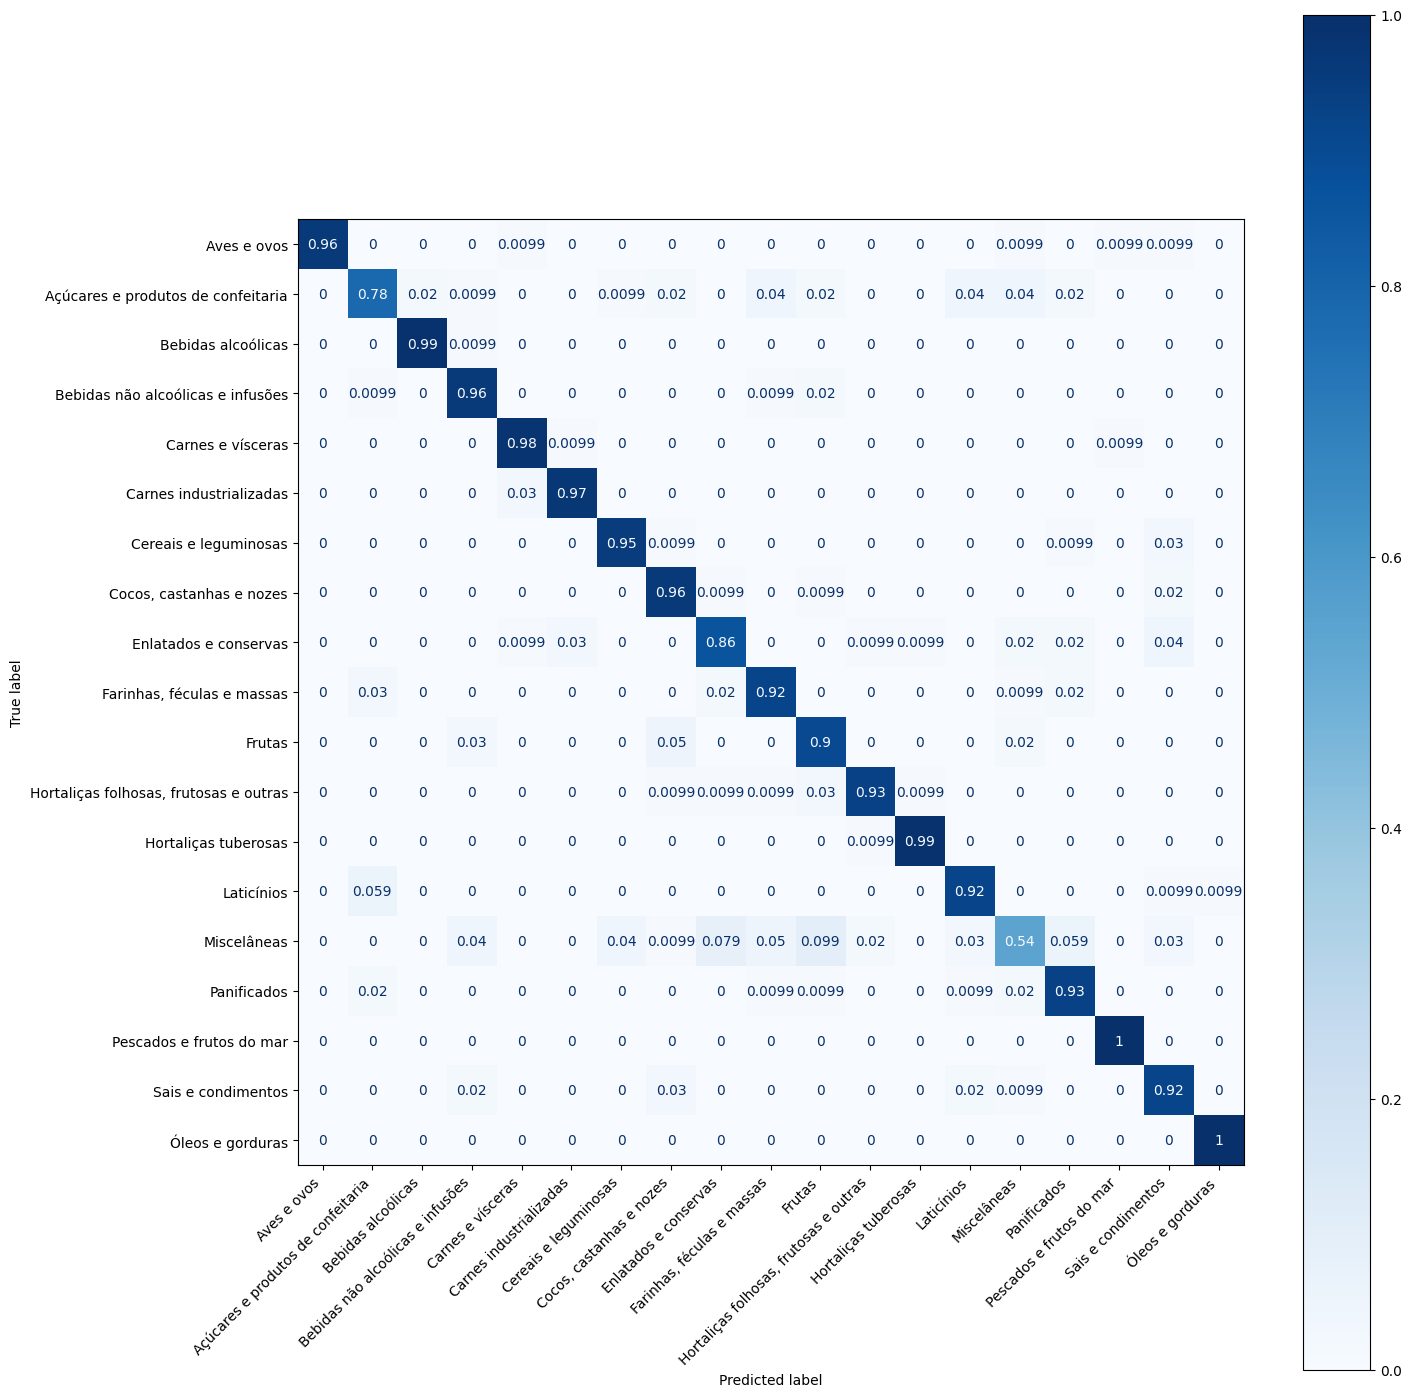

In [ ]:
# fig, axes = plt.subplots(figsize=(15,15))
# print('Acurácia de Treino: ' + str(modelo_random.score(x_treino_balanceado, y_treino_balanceado)))
# print('Acurácia de Validação: ' + str(modelo_random.score(x_val, y_val)))
# print(classification_report(y_val, y_pred_random));
# ConfusionMatrixDisplay.from_predictions(y_val, y_pred_random, normalize='true', cmap='Blues', display_labels=modelo_random.classes_, ax=axes);

fig, axes = plt.subplots(figsize=(15, 15))

# Imprime o relatório de classificação
print(classification_report(y_treino_balanceado, y_pred_random))

# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    y_treino_balanceado,
    y_pred_random,
    normalize='true',
    cmap='Blues',
    display_labels=grupo_alimentar_label,
    ax=axes
)

# Rotaciona as labels do eixo x para que não fiquem coladas
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe a figura
plt.show()

## Treinando o modelo Gradient Boosting Tree

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#modelo_gbc = GradientBoostingClassifier(random_state=reprodutibilidade, max_depth=profundidade)
# modelo_gbc.fit(x_treino_balanceado, y_treino_balanceado)
# y_pred_gbc = modelo_gbc.predict(x_val)
y_pred_gbc = cross_val_predict(modelo_gbc, x_treino_balanceado, y_treino_balanceado, cv=kf)
scores = cross_val_score(modelo_gbc, x_treino_balanceado, y_treino_balanceado, cv=kf, scoring='accuracy')

print("Scores de cada fold: ", scores)
print("Média de acurácia: ", scores.mean())

Scores de cada fold:  [0.85677083 0.86197917 0.87760417 0.86197917 0.85900783]
Média de acurácia:  0.8634682332463012


                                        precision    recall  f1-score   support

                           Aves e ovos       0.98      0.92      0.95       101
    Açúcares e produtos de confeitaria       0.83      0.70      0.76       101
                    Bebidas alcoólicas       0.96      0.95      0.96       101
     Bebidas não alcoólicas e infusões       0.88      0.91      0.90       101
                     Carnes e vísceras       0.84      0.89      0.87       101
               Carnes industrializadas       0.91      0.94      0.93       101
                 Cereais e leguminosas       0.92      0.90      0.91       101
              Cocos, castanhas e nozes       0.87      0.91      0.89       101
                 Enlatados e conservas       0.82      0.80      0.81       101
            Farinhas, féculas e massas       0.75      0.87      0.81       101
                                Frutas       0.82      0.74      0.78       101
Hortaliças folhosas, frutosas e outras 

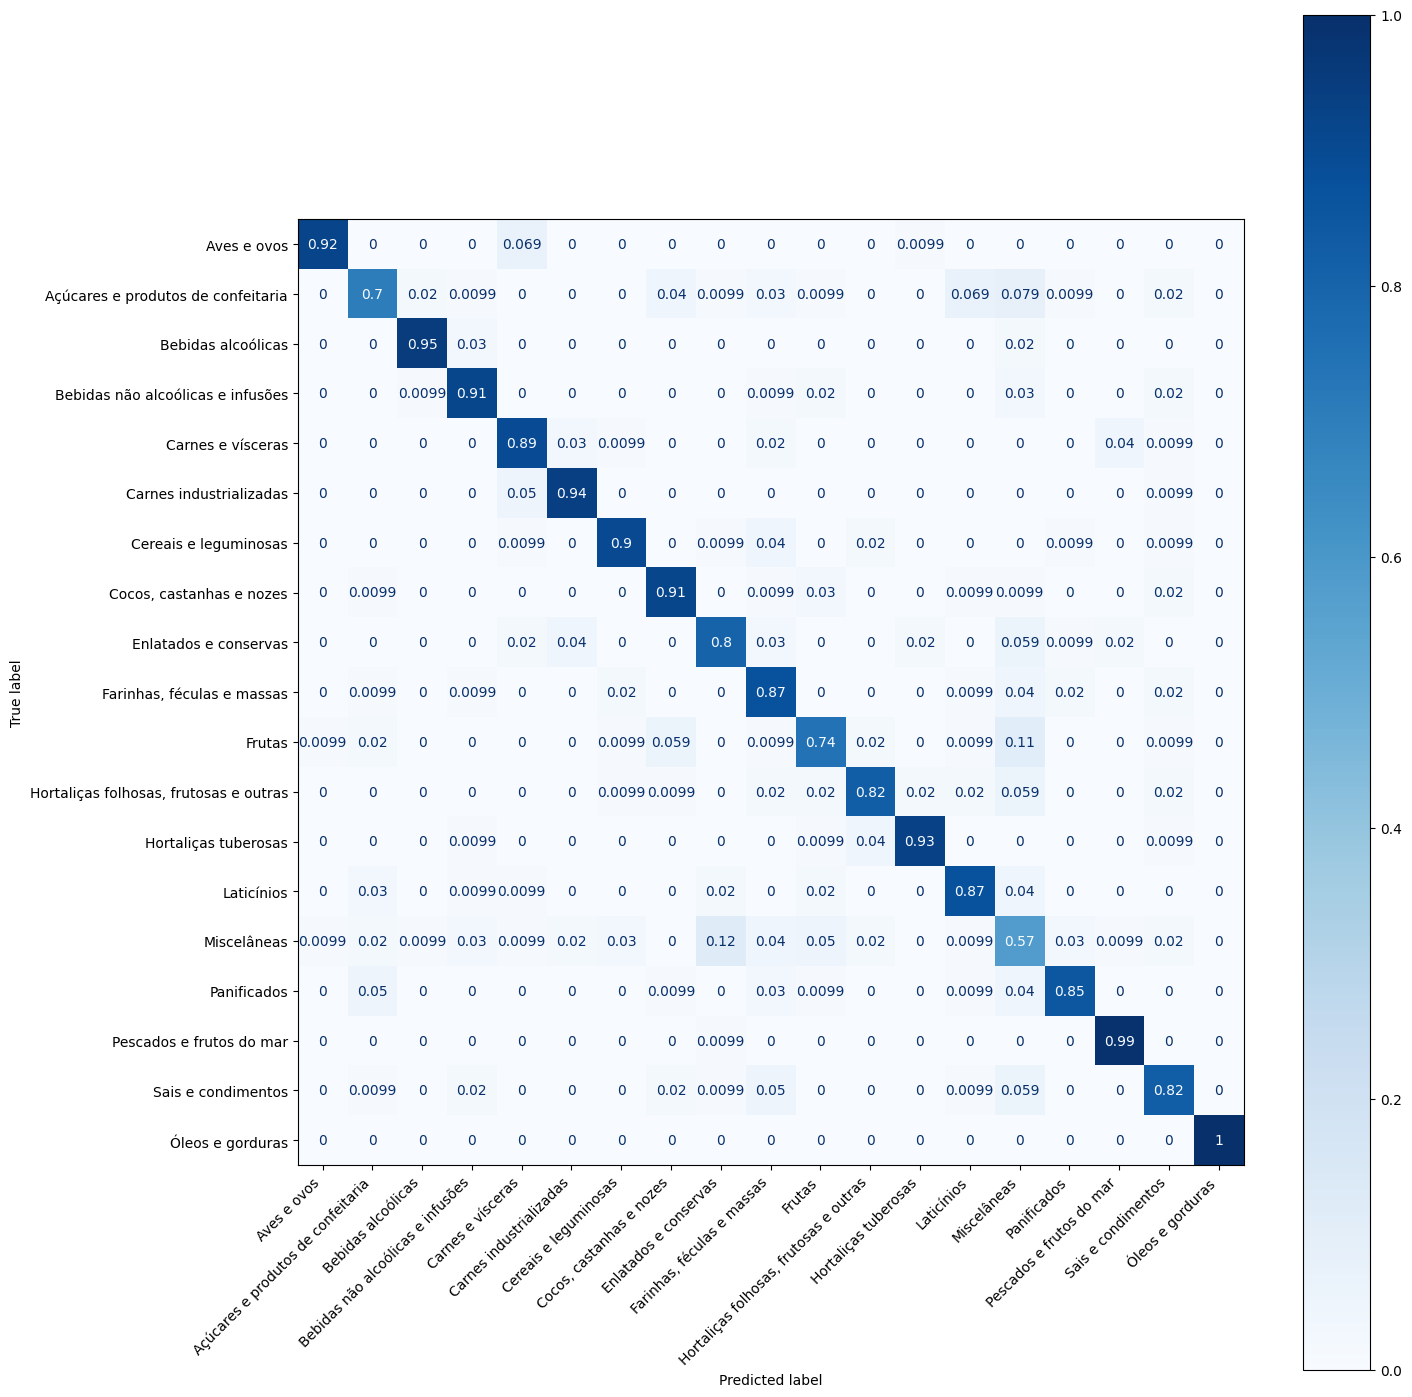

In [ ]:
# fig, axes = plt.subplots(figsize=(15,15))
# print('Acurácia de Treino: ' + str(modelo_gbc.score(x_treino_balanceado, y_treino_balanceado)))
# print('Acurácia de Validação: ' + str(modelo_gbc.score(x_val, y_val)))
# print(classification_report(y_val, y_pred_gbc))
# ConfusionMatrixDisplay.from_predictions(y_val, y_pred_gbc, normalize='true', cmap='Blues', display_labels=modelo_gbc.classes_, ax=axes);

fig, axes = plt.subplots(figsize=(15, 15))

# Imprime o relatório de classificação
print(classification_report(y_treino_balanceado, y_pred_gbc))

# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    y_treino_balanceado,
    y_pred_gbc,
    normalize='true',
    cmap='Blues',
    display_labels=grupo_alimentar_label,
    ax=axes
)

# Rotaciona as labels do eixo x para que não fiquem coladas
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe a figura
plt.show()

## Testando os modelos

In [ ]:
modelo_arvore.fit(x_treino_balanceado, y_treino_balanceado)
print('Acurácia de Treino: ' + str(modelo_arvore.score(x_treino_balanceado, y_treino_balanceado)))
y_pred_teste_arvore = modelo_arvore.predict(x_teste)


modelo_random.fit(x_treino_balanceado, y_treino_balanceado)
print('Acurácia de Treino: ' + str(modelo_random.score(x_treino_balanceado, y_treino_balanceado)))
y_pred_teste_random = modelo_random.predict(x_teste)


modelo_gbc.fit(x_treino_balanceado, y_treino_balanceado)
print('Acurácia de Treino: ' + str(modelo_gbc.score(x_treino_balanceado, y_treino_balanceado)))
y_pred_teste_gbc = modelo_gbc.predict(x_teste)


Acurácia de Treino: 0.9176654507556019
Acurácia de Treino: 0.993225638353309
Acurácia de Treino: 1.0


In [ ]:
# Imprime o relatório de classificação
print(classification_report(y_teste, y_pred_teste_arvore))

                                        precision    recall  f1-score   support

                           Aves e ovos       0.86      0.86      0.86         7
    Açúcares e produtos de confeitaria       0.57      0.36      0.44        11
                    Bebidas alcoólicas       0.67      1.00      0.80         2
     Bebidas não alcoólicas e infusões       0.75      1.00      0.86         3
                     Carnes e vísceras       0.75      0.82      0.78        11
               Carnes industrializadas       0.67      0.50      0.57         4
                 Cereais e leguminosas       0.67      0.67      0.67         3
              Cocos, castanhas e nozes       0.50      1.00      0.67         3
                 Enlatados e conservas       0.50      0.80      0.62         5
            Farinhas, féculas e massas       0.00      0.00      0.00         5
                                Frutas       0.58      0.78      0.67         9
Hortaliças folhosas, frutosas e outras 

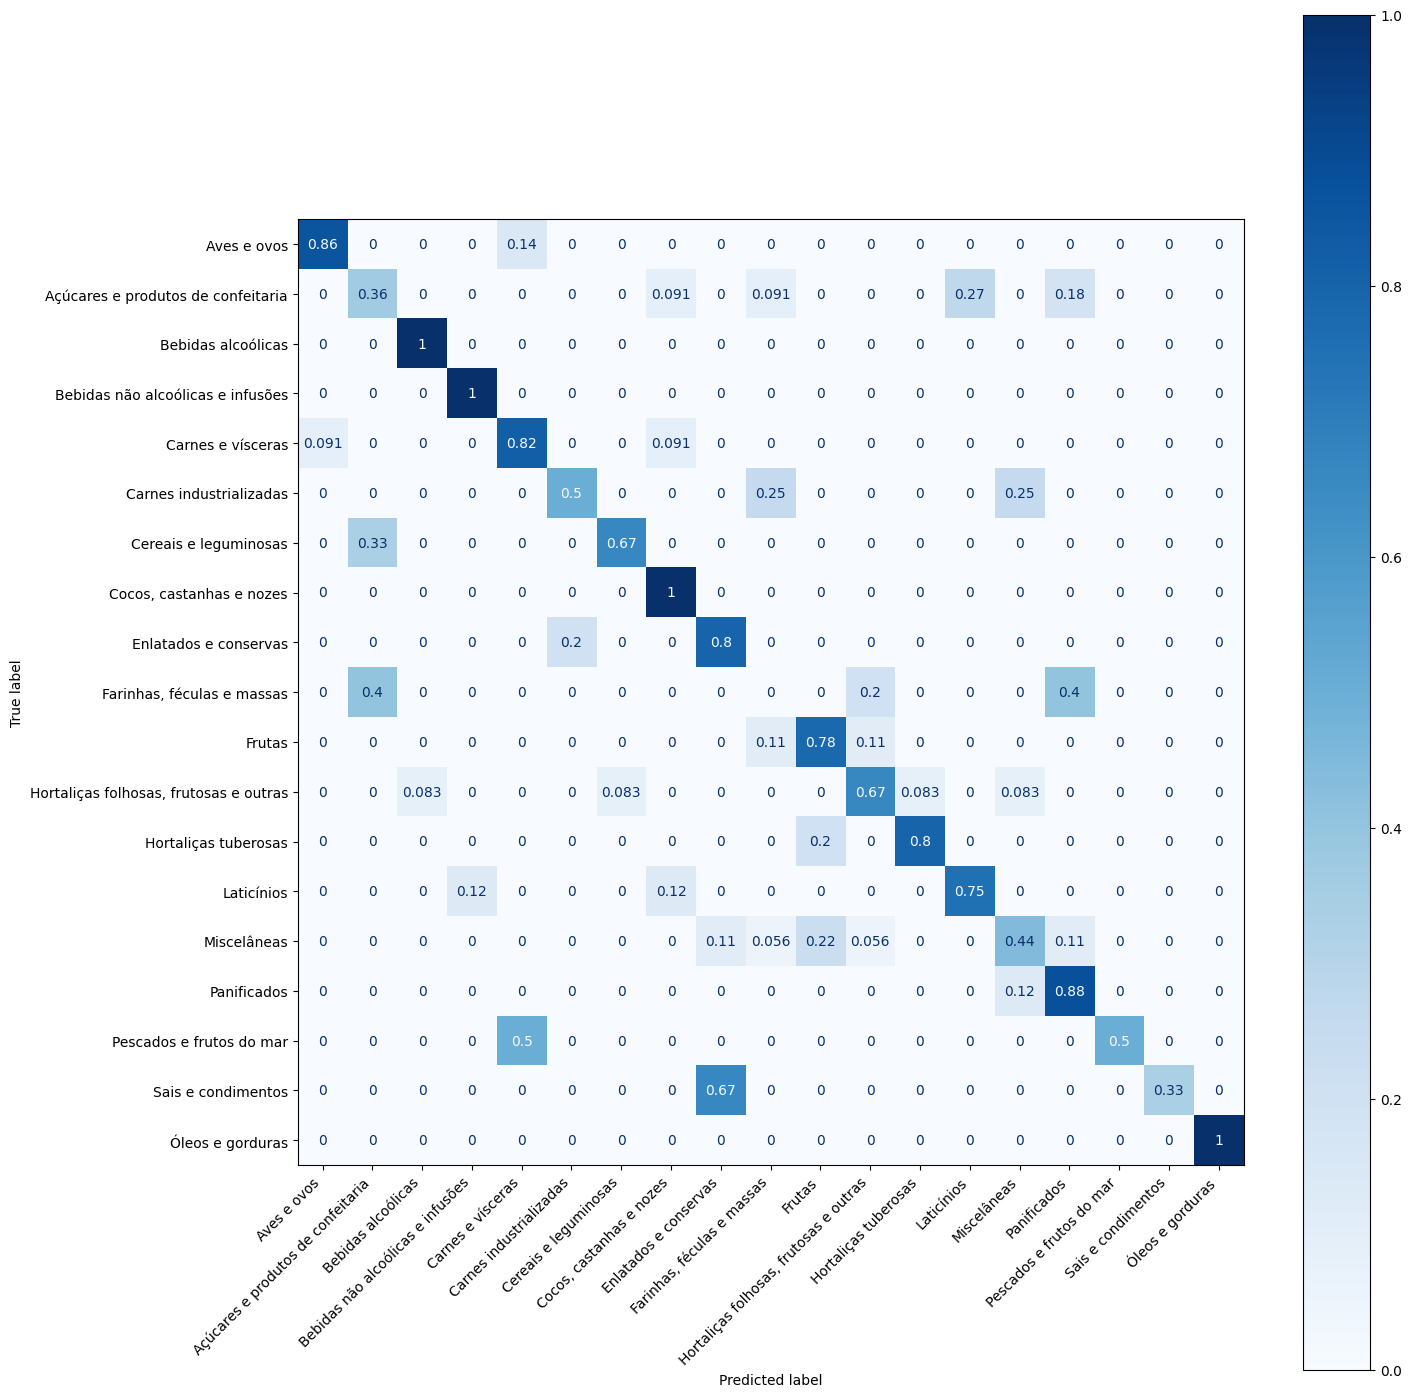

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))

# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    y_teste,
    y_pred_teste_arvore,
    normalize='true',
    cmap='Blues',
    display_labels=grupo_alimentar_label,
    ax=axes
)

# Rotaciona as labels do eixo x para que não fiquem coladas
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salva a figura
plt.savefig('matriz_de_confusao_ad.png', dpi=300)  # Salva como PNG com 300 dpi de qualidade

# Exibe a figura
plt.show()

In [ ]:
# Imprime o relatório de classificação
print(classification_report(y_teste, y_pred_teste_random))

                                        precision    recall  f1-score   support

                           Aves e ovos       1.00      1.00      1.00         7
    Açúcares e produtos de confeitaria       0.80      0.73      0.76        11
                    Bebidas alcoólicas       1.00      1.00      1.00         2
     Bebidas não alcoólicas e infusões       1.00      1.00      1.00         3
                     Carnes e vísceras       1.00      1.00      1.00        11
               Carnes industrializadas       0.75      0.75      0.75         4
                 Cereais e leguminosas       0.67      0.67      0.67         3
              Cocos, castanhas e nozes       0.60      1.00      0.75         3
                 Enlatados e conservas       0.50      0.60      0.55         5
            Farinhas, féculas e massas       0.67      0.40      0.50         5
                                Frutas       0.73      0.89      0.80         9
Hortaliças folhosas, frutosas e outras 

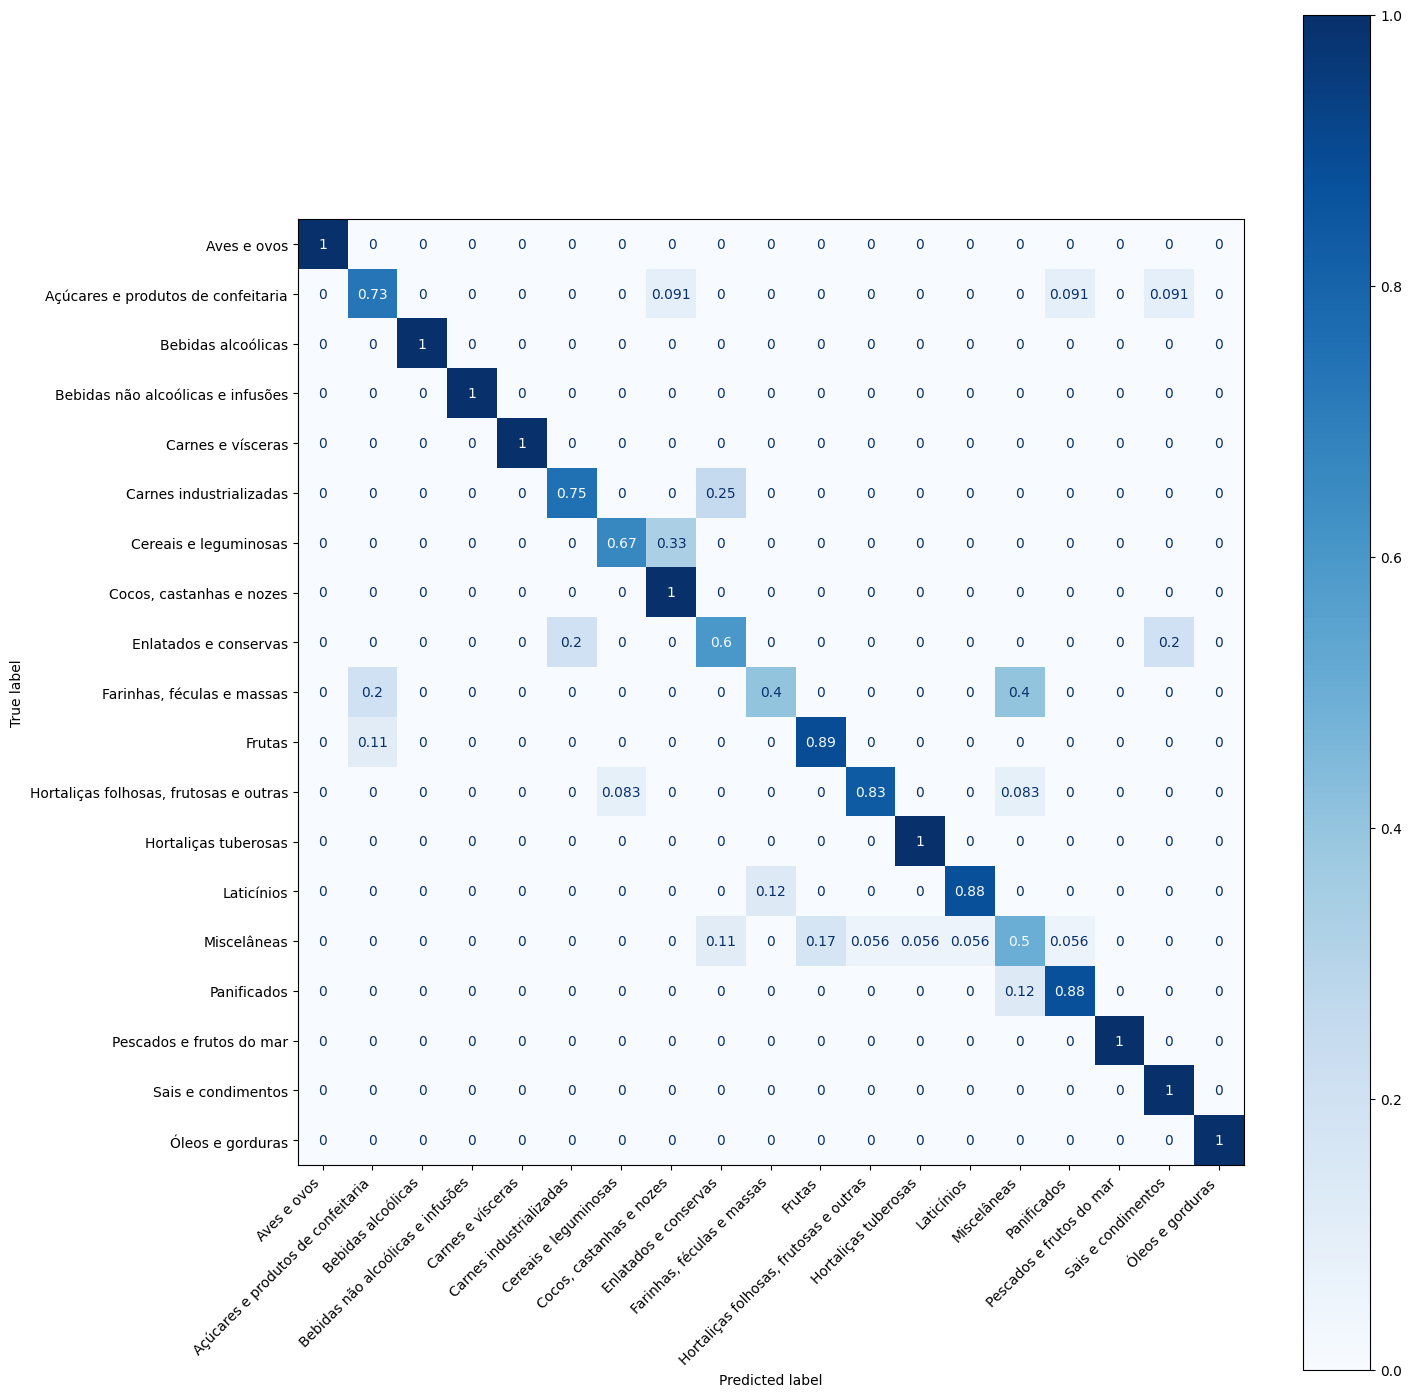

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))

# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    y_teste,
    y_pred_teste_random,
    normalize='true',
    cmap='Blues',
    display_labels=grupo_alimentar_label,
    ax=axes
)

# Rotaciona as labels do eixo x para que não fiquem coladas
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salva a figura
plt.savefig('matriz_de_confusao_rf.png', dpi=300)  # Salva como PNG com 300 dpi de qualidade

# Exibe a figura
plt.show()

In [ ]:
# Imprime o relatório de classificação
print(classification_report(y_teste, y_pred_teste_gbc))

                                        precision    recall  f1-score   support

                           Aves e ovos       0.78      1.00      0.88         7
    Açúcares e produtos de confeitaria       0.78      0.64      0.70        11
                    Bebidas alcoólicas       1.00      1.00      1.00         2
     Bebidas não alcoólicas e infusões       1.00      1.00      1.00         3
                     Carnes e vísceras       0.89      0.73      0.80        11
               Carnes industrializadas       0.75      0.75      0.75         4
                 Cereais e leguminosas       0.50      0.33      0.40         3
              Cocos, castanhas e nozes       0.25      0.33      0.29         3
                 Enlatados e conservas       1.00      0.20      0.33         5
            Farinhas, féculas e massas       0.40      0.40      0.40         5
                                Frutas       0.67      0.89      0.76         9
Hortaliças folhosas, frutosas e outras 

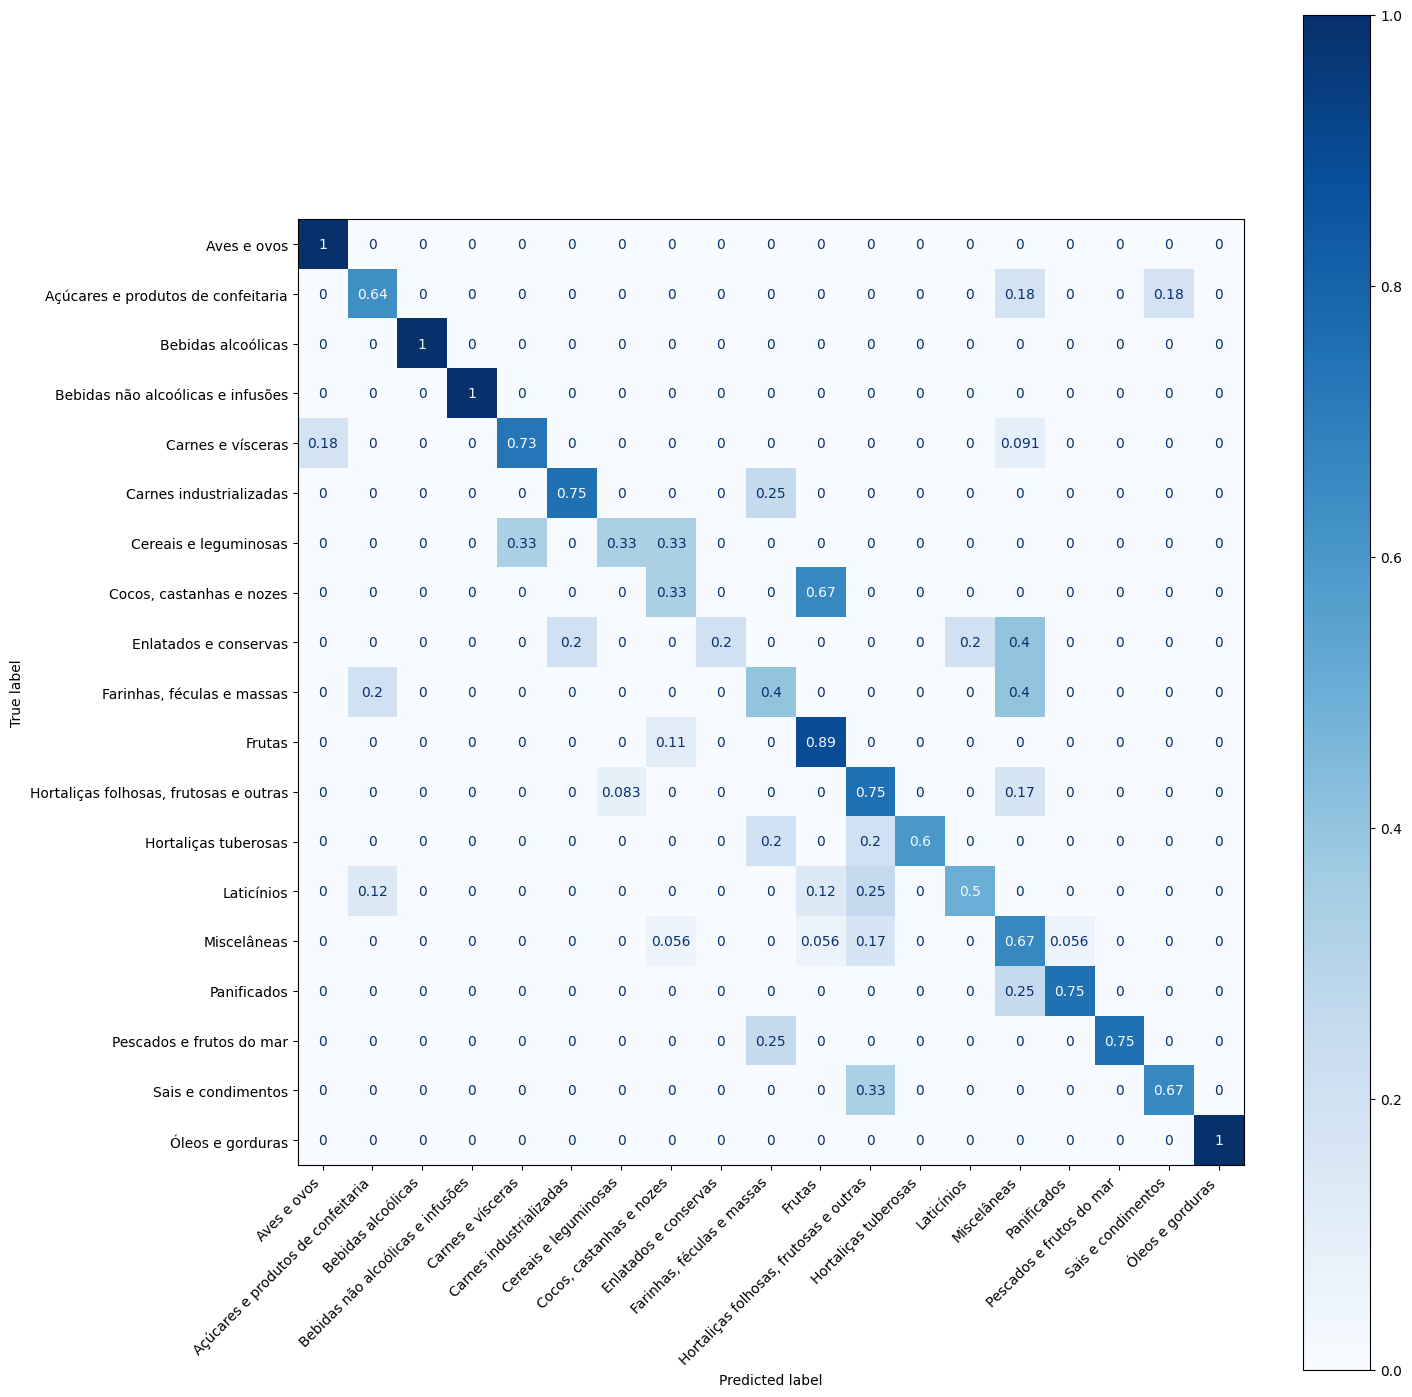

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))

# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    y_teste,
    y_pred_teste_gbc,
    normalize='true',
    cmap='Blues',
    display_labels=grupo_alimentar_label,
    ax=axes
)

# Rotaciona as labels do eixo x para que não fiquem coladas
plt.xticks(rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salva a figura
plt.savefig('matriz_de_confusao_gbc.png', dpi=300)  # Salva como PNG com 300 dpi de qualidade

# Exibe a figura
plt.show()

In [ ]:
feature_names = x_teste.columns

modelo_arvore_importantes = modelo_arvore.feature_importances_
modelo_random_importantes = modelo_random.feature_importances_
modelo_gbc_importantes = modelo_gbc.feature_importances_

ma_importantes_df = pd.DataFrame({
    'feature': feature_names,
    'importance': modelo_arvore_importantes
}).sort_values(by='importance', ascending=False)

mr_importantes_df = pd.DataFrame({
    'feature': feature_names,
    'importance': modelo_random_importantes
}).sort_values(by='importance', ascending=False)

mg_importantes_df = pd.DataFrame({
    'feature': feature_names,
    'importance': modelo_gbc_importantes
}).sort_values(by='importance', ascending=False)

def plot_feature_importances(importances_df, model_name):
    plt.figure(figsize=(10, 6))
    plt.barh(importances_df['feature'], importances_df['importance'])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância')
    plt.ylabel('Variável')
    #plt.title(f'Importância das Variáveis - {model_name}')
    plt.show()

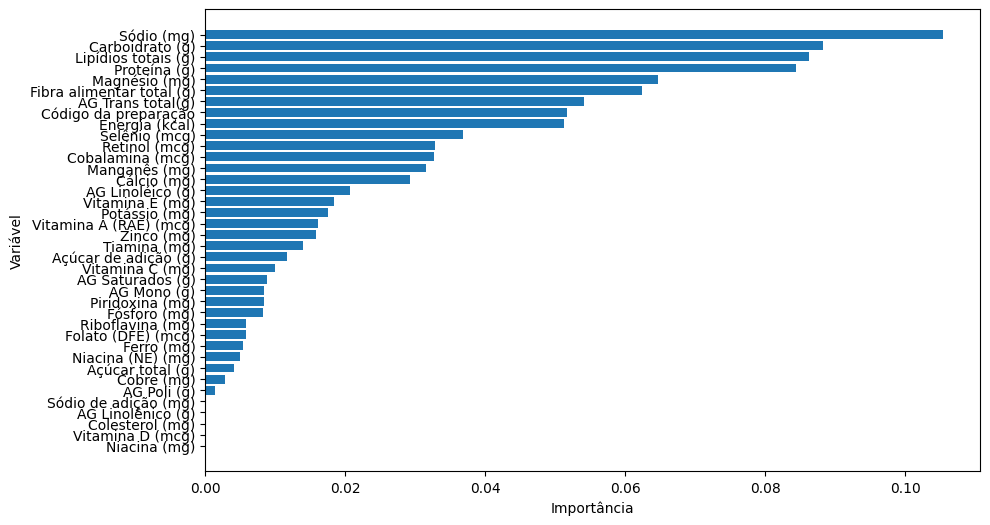

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_feature_importances(ma_importantes_df, 'Árvore de Decisão')
plt.savefig('importancia_ad.png', dpi=300)

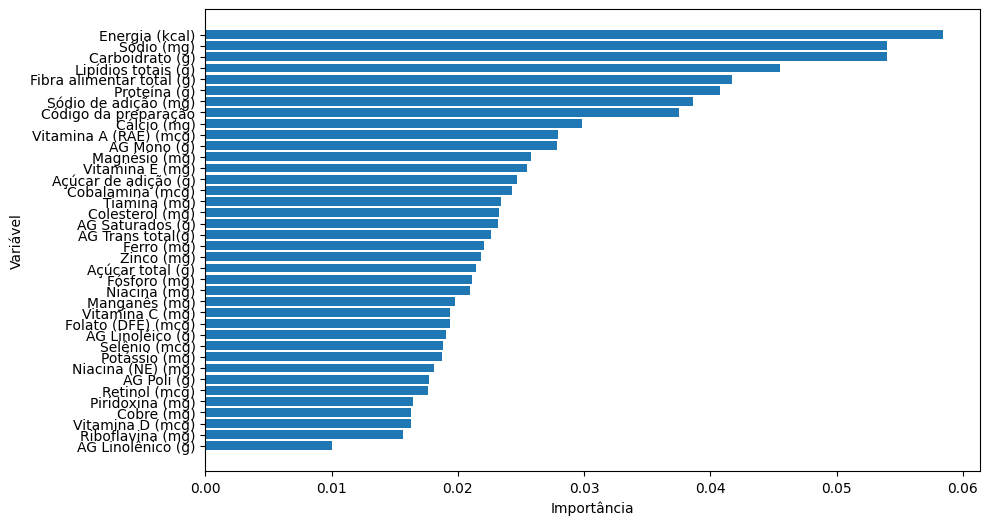

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_feature_importances(mr_importantes_df, 'Random Forest')
plt.savefig('importancia_rf.png', dpi=300)

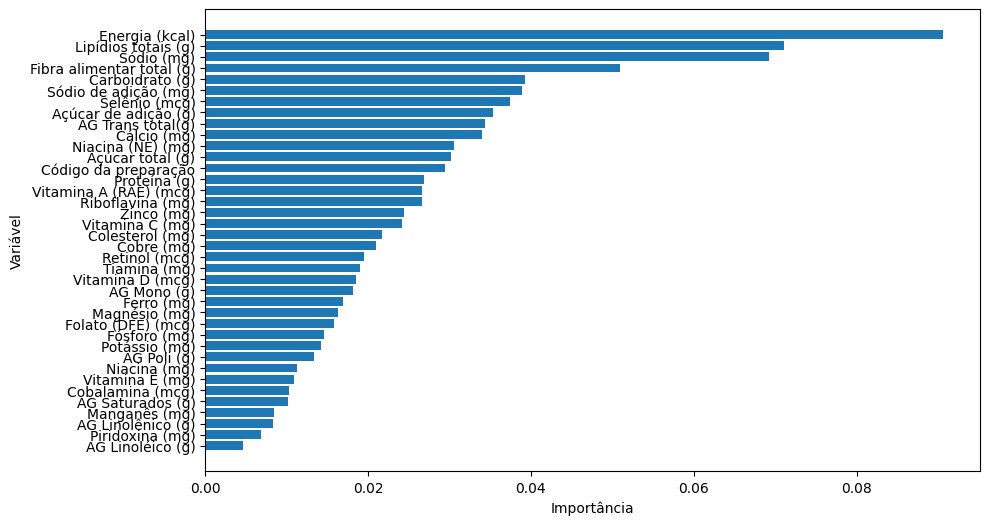

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_feature_importances(mg_importantes_df, 'Gradient Boosting')
plt.savefig('importancia_gb.png', dpi=300)